# Imports

In [45]:
import pandas as pd
import numpy as np
from recommender import load_data
import ast 
import re
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading & Inspecting Data

In [29]:
# load
df = load_data()

# get first 5
pd.set_option('display.max_columns', None)
print("df.head()=================================================")
print(df.head())

# get data structure
print("df.dtypes=================================================")
print(df.dtypes)

# get num of nulls
print("df.isnul().sum()=================================================")
print(df.isnull().sum())

# get num of uniques
print("df.nunique()=================================================")
print(df.nunique())

[INFO] CSV already exists at c:\Users\mensu\Documents\Last Sem\CS506\projects\CS506_FinalProject\new-game-plus-backend\newgameplus\data\games.csv
df.head()=================================================
    appid                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590        Grand Theft Auto V Legacy   2015-04-13            17   0.00   
4  488824  Tom Clancy's Rainbow Six® Siege   2015-12-01            17  19.99   

   dlc_count                               detailed_description  \
0          1  For over two decades, Counter-Strike has offer...   
1          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2          2  The most-played game on Steam. Every day, mill...   
3          0  When a young street hustler, a r

# Preprocessing

In [30]:
# remove the null name rows
df = df.drop(df.loc[df['name'].isna()].index)

# drop USELESS columns
df = df.drop(['name','tags','reviews', 'appid', 'detailed_description', 'about_the_game', 'short_description', 'header_image', 'website', 'support_url','support_email','metacritic_url','notes', 'packages', 'developers', 'publishers','screenshots', 'movies','user_score','score_rank','estimated_owners','positive','negative'], axis=1) # edw: undrop reviews and sentiment thing

In [31]:
# clean data
df['release_date_cleaned'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.drop(['release_date'], axis=1)




In [32]:
#Idetnfying the unique supported_languages


#print(type(df['supported_languages'].iloc[0]))

#def clean_language(lang):
    # Remove leading/trailing whitespace and newlines
#    lang = lang.strip()
    # Remove HTML-like tags (like [b][/b])
#    lang = re.sub(r'\[/?b\]', '', lang)
    # Strip again after removing tags
#    lang = lang.strip()
#    return lang


#df['supported_languages'] = df['supported_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

#unique_supported_languages = set()

#for langs in df['supported_languages']:  # Replace with your actual column name
#    if isinstance(langs, list):
#        for lang in langs:
            # Some entries may still have multiple langs joined with commas
#            for l in lang.split(','):
#                cleaned = clean_language(l)
#                unique_supported_languages.add(cleaned)

#unique_supported_languages = list(unique_supported_languages)
#print("Unique supported languages", unique_supported_languages)


In [33]:
#One hot encoding the languages

#lang_columns = {}

#for lang in unique_supported_languages:
#    lang_columns[lang+"_supported_languages"] = df['supported_languages'].apply(lambda x: 1 if lang in x else 0)

#lang_df = pd.DataFrame(lang_columns)

#df = pd.concat([df, lang_df], axis=1)

df.drop("supported_languages", axis = 1, inplace = True)

#print(df.head())

In [34]:
#identify the unique supported audios
#df['full_audio_languages'] = df['full_audio_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

#unique_full_audio_languages = set()

#for langs in df['full_audio_languages']:  # Replace with your actual column name
#    if isinstance(langs, list):
#        for lang in langs:
            # Some entries may still have multiple langs joined with commas
#            for l in lang.split(','):
#                cleaned = clean_language(l)
#                unique_full_audio_languages.add(cleaned)

#unique_full_audio_languages = list(unique_full_audio_languages)
#print("Unique Full Audio Languages:", unique_full_audio_languages)

In [35]:
#one hot encoding full audio languages

#audio_lang_columns = {}

#for audio_lang in unique_full_audio_languages:
#    audio_lang_columns[audio_lang+"_full_audio_languages"] = df['full_audio_languages'].apply(lambda x: 1 if lang in x else 0)

#audio_lang_df = pd.DataFrame(audio_lang_columns)

#df = pd.concat([df, audio_lang_df], axis=1)

df.drop("full_audio_languages", axis=1, inplace=True)


#print(df.head())

In [36]:
#Identifying the unique genres
import ast
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

unique_genres = set()

for genres in df['genres']:
    if isinstance(genres, list):
        unique_genres.update(genres)

unique_genre_list = list(unique_genres)
#print("Unique genres:", unique_genre_list)

In [37]:
#One hot encoding the genres
for genre in unique_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)

df.drop("genres", axis=1, inplace=True)


#print(df.head())

In [38]:
#identifying unique categories

import ast
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

unique_categories = set()

for categories in df['categories']:
    if isinstance(categories, list):
        unique_categories.update(categories)

unique_categories_list = list(unique_categories)
#print("Unique categories:", unique_categories_list)

In [39]:
#One hot encoding the genres

for categories in unique_categories:
    df[categories] = df['categories'].apply(lambda x: 1 if categories in x else 0)

df.drop("categories", axis=1, inplace=True)

#print(df.head())

In [41]:
# convert boolean into numerical
df['windows'] = df['windows'].astype(int)
df['mac'] = df['mac'].astype(int)
df['linux'] = df['linux'].astype(int)


In [42]:
# drop datetime
df = df.drop('release_date_cleaned', axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
X = df
X

<class 'pandas.core.frame.DataFrame'>
Index: 94946 entries, 0 to 94947
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   required_age                94946 non-null  int64  
 1   price                       94946 non-null  float64
 2   dlc_count                   94946 non-null  int64  
 3   windows                     94946 non-null  int64  
 4   mac                         94946 non-null  int64  
 5   linux                       94946 non-null  int64  
 6   metacritic_score            94946 non-null  int64  
 7   achievements                94946 non-null  int64  
 8   recommendations             94946 non-null  int64  
 9   average_playtime_forever    94946 non-null  int64  
 10  average_playtime_2weeks     94946 non-null  int64  
 11  median_playtime_forever     94946 non-null  int64  
 12  median_playtime_2weeks      94946 non-null  int64  
 13  discount                    94946 no

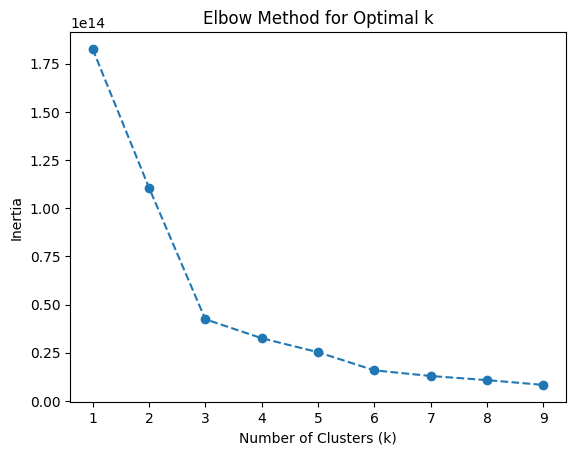

In [46]:

#X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X)
#X_test_scaled = scaler.transform(X_test)  # Use the same scaler for testing data


inertia = []
k_values = range(1, 10)

for k in k_values:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()






In [48]:
# run kmeans based on the k found
kmeans = KMeans(n_clusters=9, random_state=97) # set number of clusters
labels = kmeans.fit_predict(X) # X is your data
score = silhouette_score(X, labels)
print(score)

0.9829306925909891
